In [1]:
# 20250307 24?? 번째??? 수업 ??? 우와 대박

In [13]:
import pandas as pd
file_path = "./data ref/로또회차별당첨번호.csv"
LOTTO = pd.read_csv(file_path,encoding="utf-8")
LOTTO.sample(3)

,회차별 추첨결과,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
1039,NaN,136,2005.07.09,6,"1,997,694,150원",26,"76,834,391원","1,279","1,561,919원","66,993","59,639원","1,119,075","5,000원",2,16.0,30.0,36.0,41.0,42.0,11
759,NaN,416,2010.11.20,10,"1,072,037,100원",32,"55,835,266원","1,501","1,190,359원","70,470","50,000원","1,122,015","5,000원",5,6.0,8.0,11.0,22.0,26.0,44
1108,NaN,67,2004.03.13,7,"2,114,436,500원",62,"39,787,700원",972,"2,537,900원","46,740","105,500원","748,901","10,000원",3,7.0,10.0,15.0,36.0,38.0,33


In [21]:
lotto = LOTTO.copy()
lotto.columns = ['round', '-','-','-','-','-','-','-','-','-','-','-','-','1','2','3','4','5','6','bonus']
# lotto.sample(3)
lotto = lotto.loc[2:,['1','2','3','4','5','6','bonus']].round(0)
lotto = lotto.reset_index(drop=True)
lotto = lotto.astype(int)
lotto

,1,2,3,4,5,6,bonus
0,1,5,18,20,30,35,3
1,7,9,24,40,42,44,45
2,3,6,7,11,12,17,19
3,3,13,28,34,38,42,25
4,5,12,24,26,39,42,20
...,...,...,...,...,...,...,...
1168,16,24,29,40,41,42,3
1169,14,27,30,31,40,42,2
1170,11,16,19,21,27,31,30
1171,9,13,21,25,32,42,2


In [28]:
from collections import Counter


# 1. 당첨 숫자 전체 펼치기
lottolist = lotto.values.flatten()

# 2. 등장 횟수 세기
lottolistcount = Counter(lottolist)

# 3. 가장 많이 나온 숫자 상위 8개 뽑기
most_common_8 = [int(num) for num, count in lottolistcount.most_common(8)]

# 4. 결과 출력
print("가장 많이 나온 숫자 8개:", most_common_8)

가장 많이 나온 숫자 8개: [34, 12, 27, 13, 33, 17, 43, 1]


In [11]:
# OS에 사용가능한 , 설치된 폰트를 나열
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths=None, fontext='ttf')
#fontlist : 있는 폰트 다 보여줌 ~

Text(0.2, 0.4, '한글')

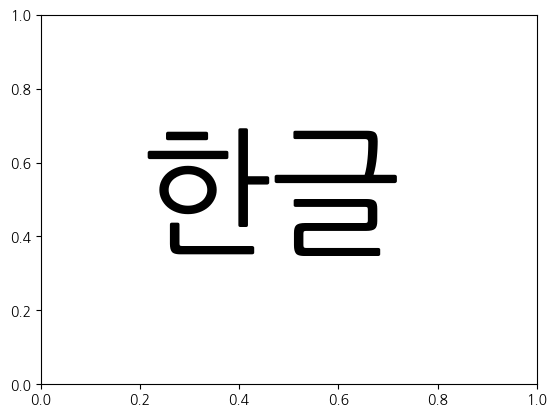

In [12]:
# 윈도우용 폰트 경로 설정
# path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
# font_name = fm.FontProperties(fname=path).get_name()
# rc('font',family=font_name)

# 리눅스용 폰트 경로 설정
plt.rc('font',family ="NanumGothic")
plt.text(0.2,0.4,'한글',size=100)

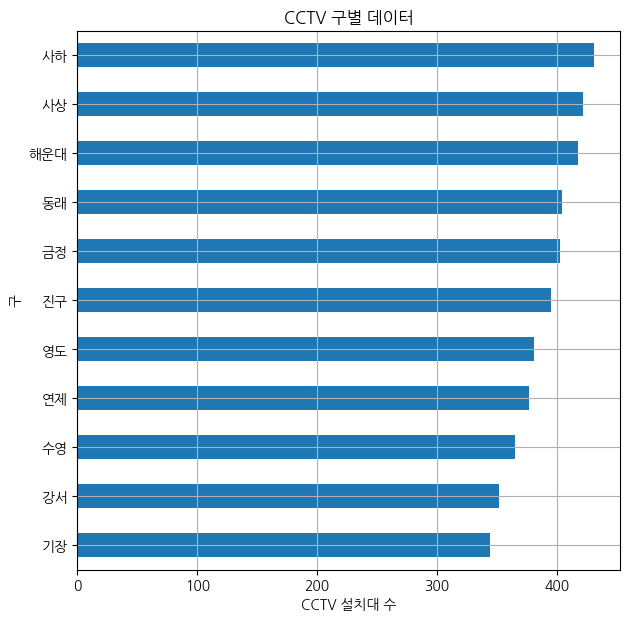

In [13]:
# plt.figure()
# plt.figure()
total['count'].sort_values().plot( kind="barh",grid=True,figsize=(7,7), ylabel="구")

plt.title("CCTV 구별 데이터")
plt.xlabel("CCTV 설치대 수")
plt.show()

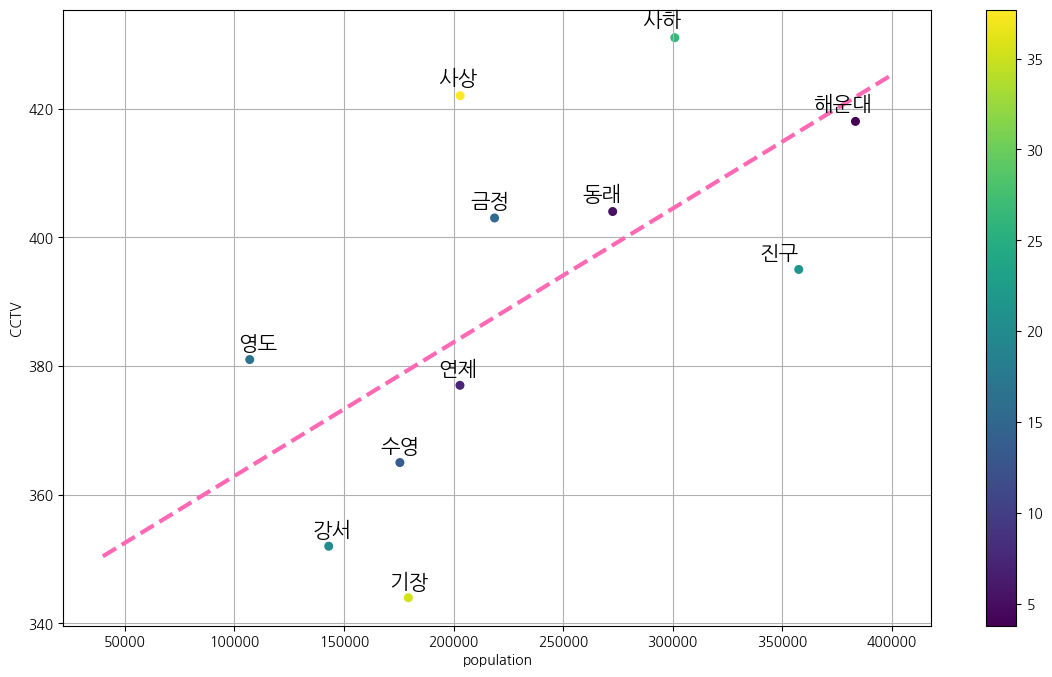

In [14]:
import numpy as np
fp1 = np.polyfit(total['population'],total['count'],1)  # 여기서 1은 기울기 !!

f1 = np.poly1d(fp1)  # 기울기와 함수를 만들어내는 과정

fx = np.linspace(40000,400000,10)
plt.figure(figsize=(14,8))
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='hotpink')

# 오차
total['err'] = np.abs(total['count']-f1(total['population']))

plt.scatter(total['population'],total['count'], s= 30, c = total['err'])
plt.xlabel('population')
plt.ylabel('CCTV')
plt.plot()

# 각 점마다 동의 이름을 부여 !!
for i in range(len(total['population'])):
    plt.text(total['population'].iloc[i]*0.95,total['count'].iloc[i]*1.004,total.index[i],fontsize=15)
                                     #  ㄴ글자가 왼쪽으로 갈 수 있도록 /올라갈 수 있도록 숫자를 곱해줌!!

plt.grid()
plt.colorbar()
plt.show()


In [1]:
# total['local']
# total['count']


# for n in range(len(total['local']))
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.text(total['population'].iloc[0],total['count'].iloc[0],total.index[0],fontsize=15)
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='g')

plt.show()

NameError: name 'total' is not defined

<Figure size 1300x1000 with 0 Axes>

(부산)
- CCTV 설치수
- 인구
- 범죄율

(서울)
- CCTV 설치수
- 인구
- 범죄율